In [5]:

import lightgbm as lgb
import optuna
import numpy as np
import pandas as pd
from postprocessing import post_processing
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
import datetime
datetime.datetime.now().strftime('%Y-%m-%d %H:%M')

'2025-01-21 16:15'

In [ ]:


train_dir = 'data/processed/census_income_learn.csv'
test_dir = 'data/processed/census_income_test.csv'

# Load the train/test data
print("Train data: ###############################")
X_train, y_train = post_processing(train_dir, get_dummies= False)
# X_train = X_train.astype(int)
print(f'X_train shape: {X_train.shape}')

print("\nTest data: ###############################")
X_test, y_test = post_processing(test_dir, get_dummies= False)
# X_test = X_test.astype(int)
print(f'X_test shape: {X_test.shape}')

Train data: ###############################
Number of numeric columns: 8
Number of numeric columns: 20
X_train shape: (196294, 27)

Test data: ###############################
Number of numeric columns: 8
Number of numeric columns: 20
X_test shape: (98879, 27)


In [65]:
df = pd.concat([X_train, y_train], axis=1)
df[df['age'] >= 18]['target'].value_counts(normalize= True)

target
1    0.913709
0    0.086291
Name: proportion, dtype: float64

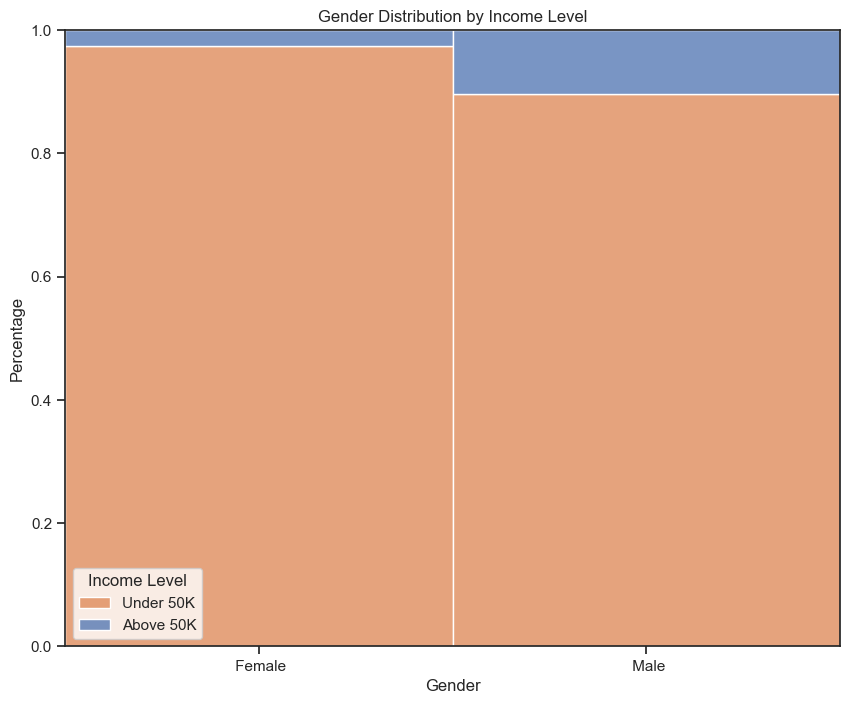

In [25]:
sns.set_theme(style="ticks")  # Set the theme
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='sex', hue='target', stat='percent', multiple="fill")
plt.title('Gender Distribution by Income Level')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(labels=['Under 50K', 'Above 50K'], title='Income Level')

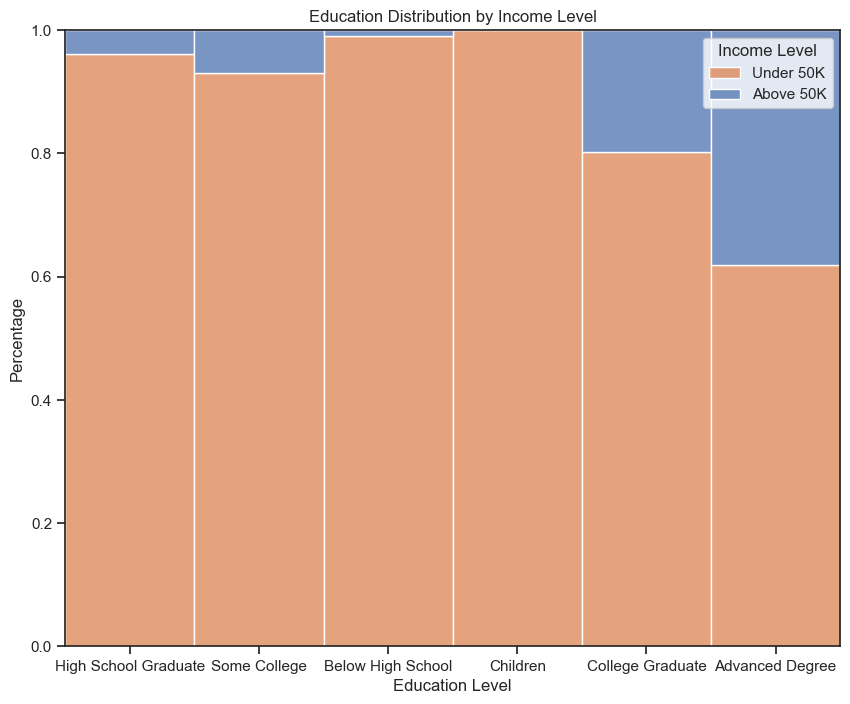

In [46]:
sns.set_theme(style="ticks")  # Set the theme
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='education', hue='target', stat='percent', multiple="fill")
plt.title('Education Distribution by Income Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(labels=['Under 50K', 'Above 50K'], title='Income Level')

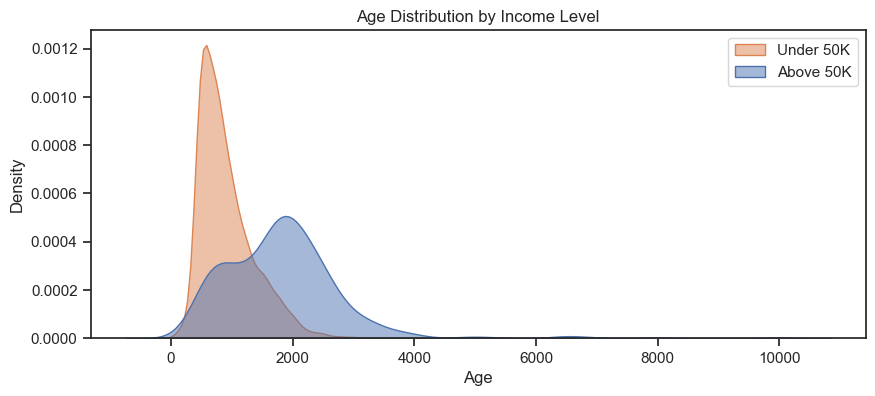

In [66]:
sns.set_theme(style="ticks")  # Set the theme
plt.figure(figsize=(10, 4))
sns.kdeplot(data=df[df['wage_per_hour'] > 0], x='wage_per_hour', hue='target', fill=True, alpha=0.5, common_norm=False)
plt.title('Age Distribution by Income Level')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(labels=['Under 50K', 'Above 50K'])

In [8]:
df.head().T

,0,1,2,3,4
age,73,58,18,9,10
wage_per_hour,0,0,0,0,0
capital_gains,0,0,0,0,0
capital_losses,0,0,0,0,0
dividends_from_stocks,0,0,0,0,0
num_persons_worked_for_employer,0,1,0,0,0
weeks_worked_in_year,0,52,0,0,0
class_of_worker,Not in universe,Self-employed,Not in universe,Not in universe,Not in universe
education,High School Graduate,Some College,Below High School,Children,Children
enroll_in_edu_inst_last_wk,Not in universe,Not in universe,High school,Not in universe,Not in universe


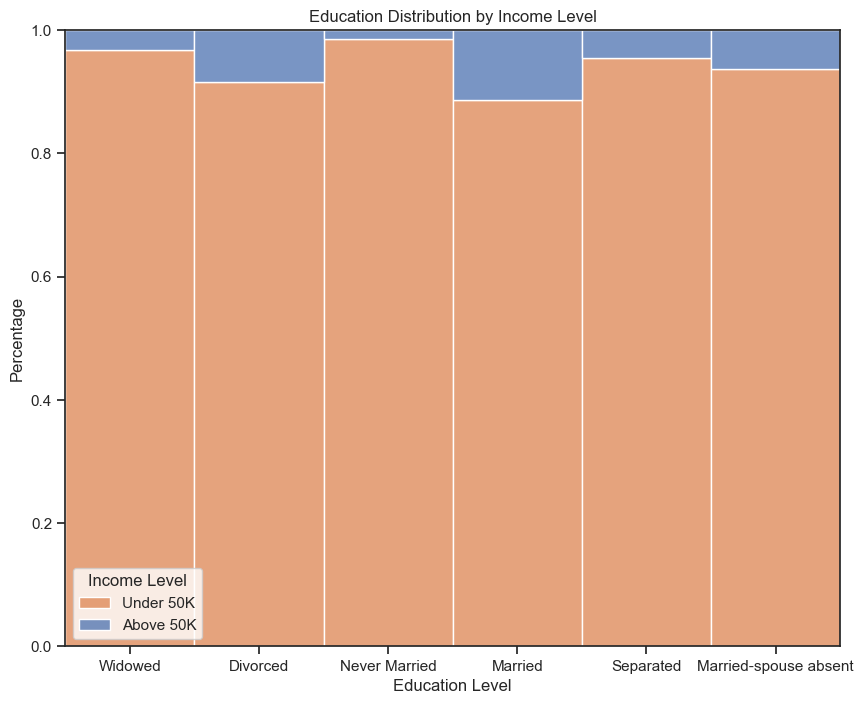

In [61]:




sns.set_theme(style="ticks")  # Set the theme
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='marital_stat', hue='target', stat='percent', multiple="fill")
plt.title('Education Distribution by Income Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(labels=['Under 50K', 'Above 50K'], title='Income Level')

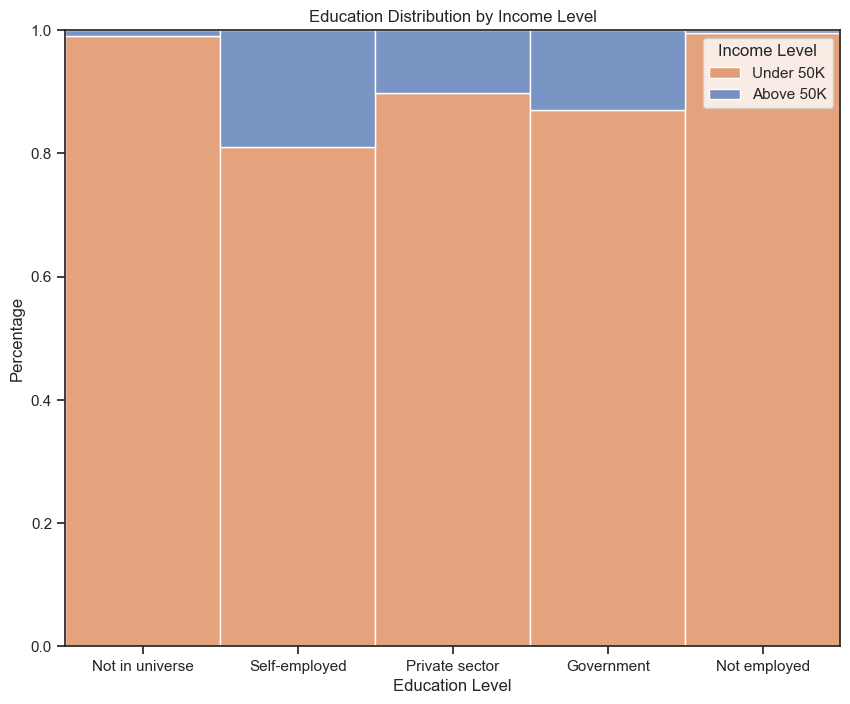

In [56]:



sns.set_theme(style="ticks")  # Set the theme
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='class_of_worker', hue='target', stat='percent', multiple="fill")
plt.title('Education Distribution by Income Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(labels=['Under 50K', 'Above 50K'], title='Income Level')

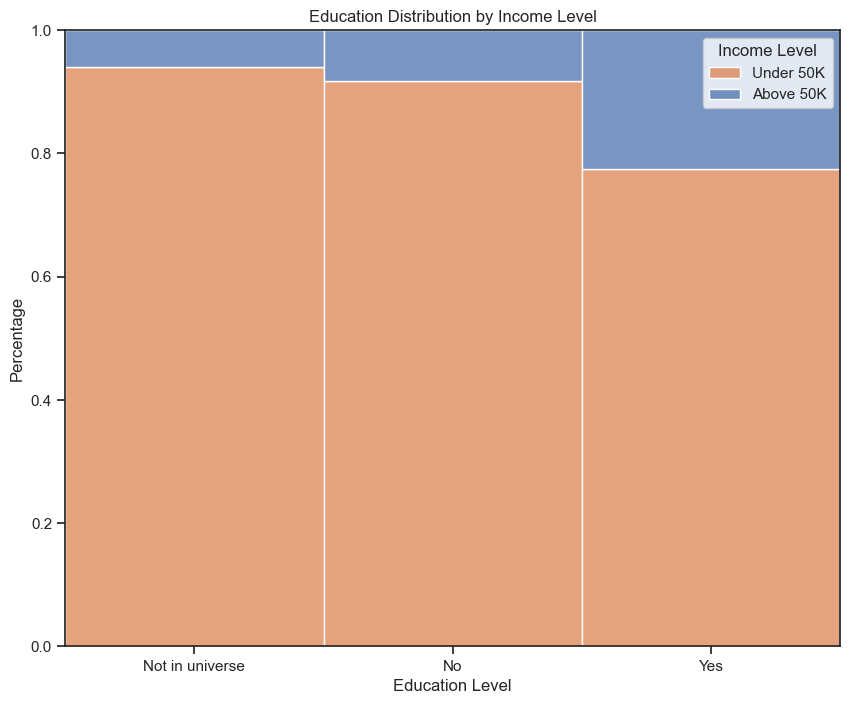

In [55]:

sns.set_theme(style="ticks")  # Set the theme
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='own_business_or_self_employed', hue='target', stat='percent', multiple="fill")
plt.title('Education Distribution by Income Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(labels=['Under 50K', 'Above 50K'], title='Income Level')

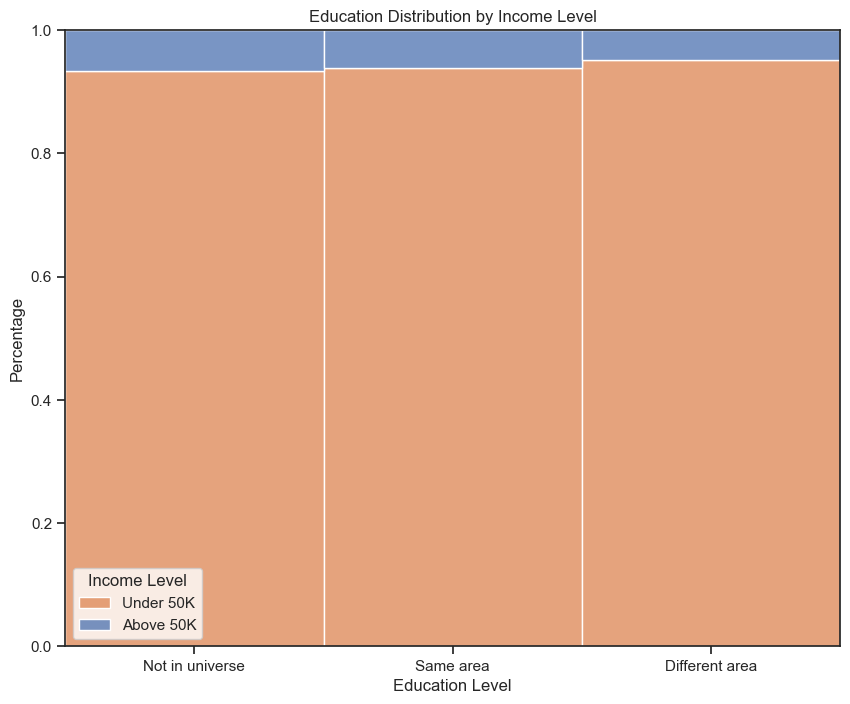

In [54]:

sns.set_theme(style="ticks")  # Set the theme
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='migration_code_change_in_reg', hue='target', stat='percent', multiple="fill")
plt.title('Education Distribution by Income Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(labels=['Under 50K', 'Above 50K'], title='Income Level')

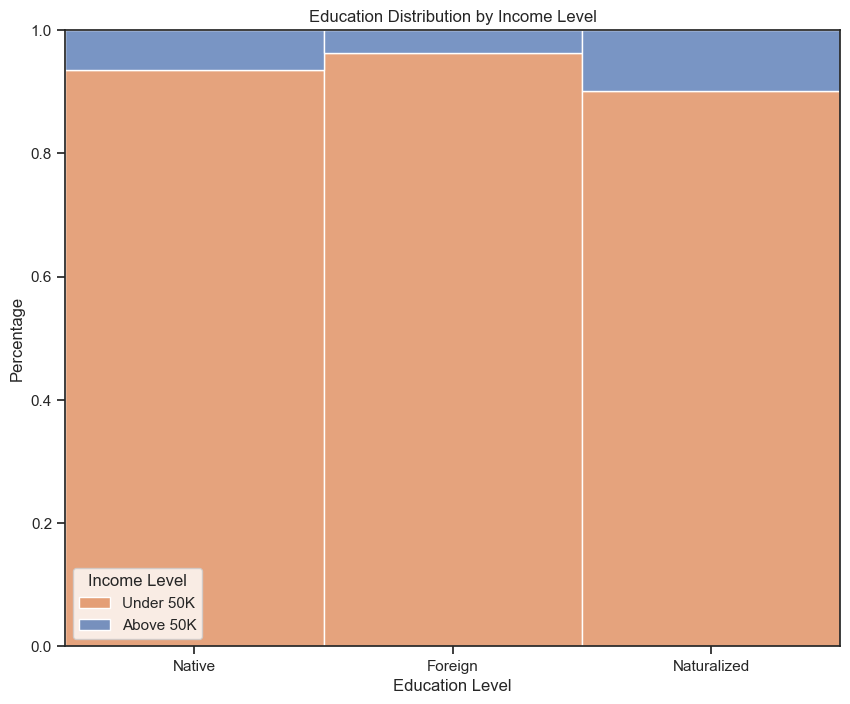

In [48]:
sns.set_theme(style="ticks")  # Set the theme
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='citizenship', hue='target', stat='percent', multiple="fill")
plt.title('Education Distribution by Income Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(labels=['Under 50K', 'Above 50K'], title='Income Level')

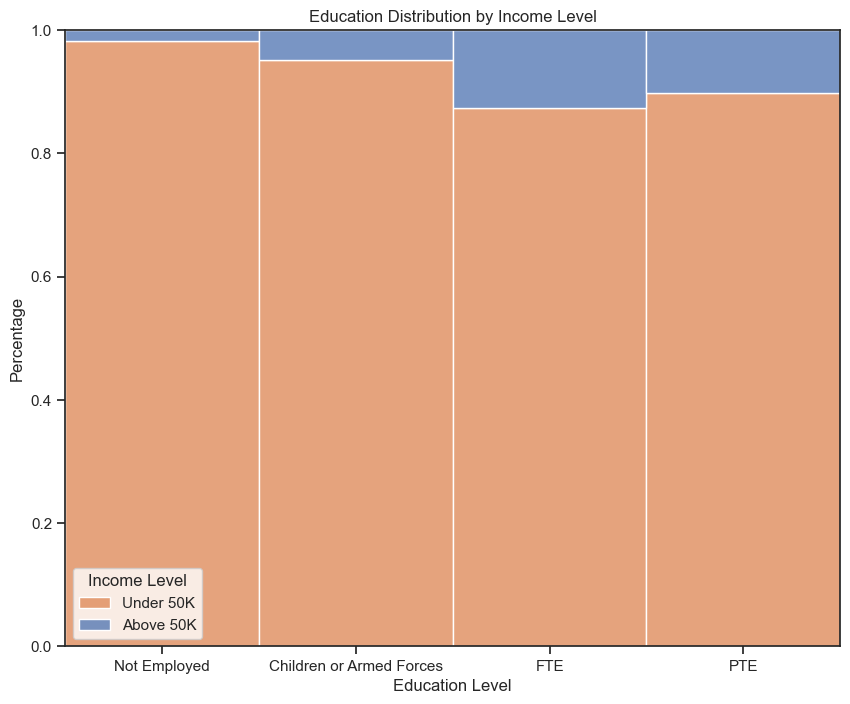

In [49]:
sns.set_theme(style="ticks")  # Set the theme
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='full_or_part_time_employment_stat', hue='target', stat='percent', multiple="fill")
plt.title('Education Distribution by Income Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(labels=['Under 50K', 'Above 50K'], title='Income Level')

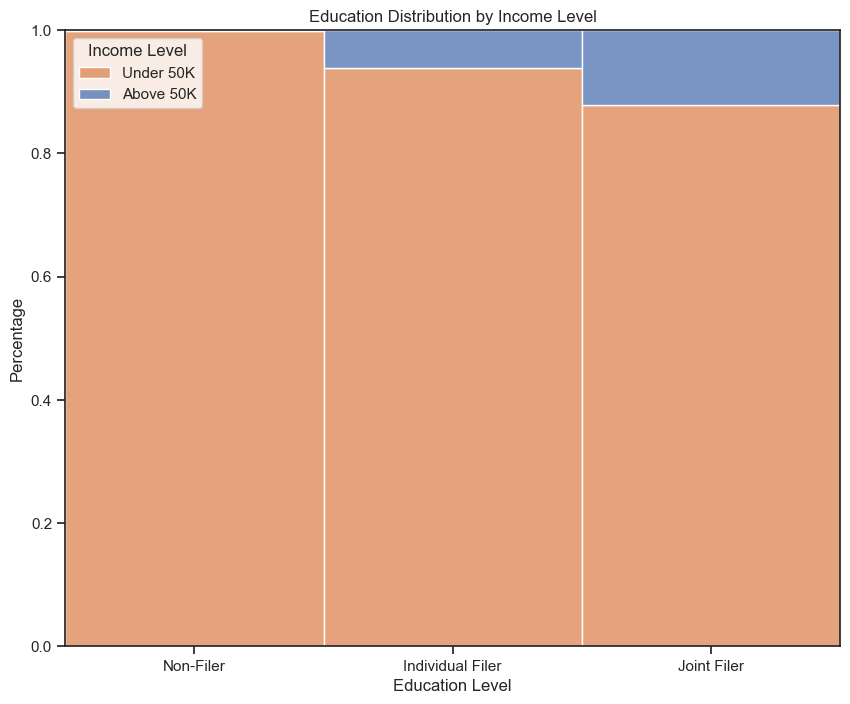

In [50]:


sns.set_theme(style="ticks")  # Set the theme
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='tax_filer_stat', hue='target', stat='percent', multiple="fill")
plt.title('Education Distribution by Income Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(labels=['Under 50K', 'Above 50K'], title='Income Level')

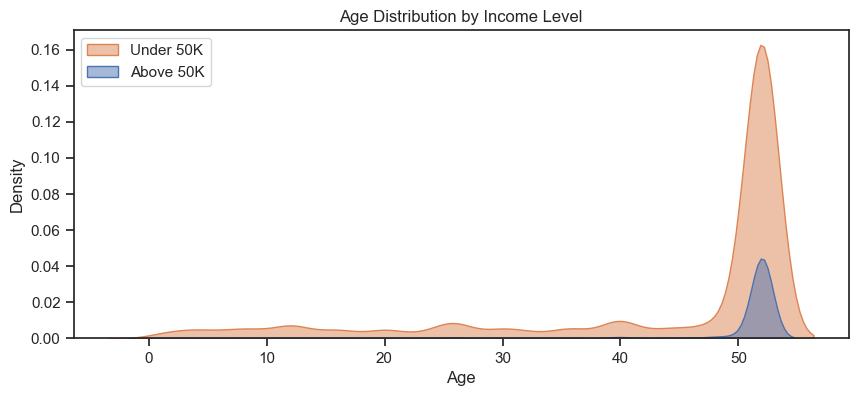

In [52]:


sns.set_theme(style="ticks")  # Set the theme
plt.figure(figsize=(10, 4))
sns.kdeplot(data=df[df['weeks_worked_in_year'] > 0], x='weeks_worked_in_year', hue='target', fill=True, alpha=0.5)
plt.title('Age Distribution by Income Level')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(labels=['Under 50K', 'Above 50K'])